# OIC-234 Analyzing area of EB cells

This project is in collaboration with Junwei Niu (Wen Lab). The goal is to identify "light" regions, which are indicative of differentiated cells, in each organoid. To determine "light" vs "dark", this code uses Otsu's method to pick a threshold. Alternatives could include using histogram percentiles.

In [1]:
# Import required packages
import numpy as np
from scipy import ndimage as ndi
import skimage
import os
import matplotlib.pyplot as plt
import csv
from core_utils import imoverlay
import segmentation

In [2]:
# Specify input/output directories
data_directory = '\\\\pn.vai.org\\projects\\wen\\vari-core-generated-data\\OIC\\OIC-234 EB Junwei\\EB8 image'
output_directory = "\\\\pn.vai.org\\projects\\wen\\vari-core-generated-data\\OIC\\OIC-234 EB Junwei\\EB8 image\\Measurements"

Processing file: \\pn.vai.org\projects\wen\vari-core-generated-data\OIC\OIC-234 EB Junwei\EB8 image\WT23-2 2X.tif
Processing file: \\pn.vai.org\projects\wen\vari-core-generated-data\OIC\OIC-234 EB Junwei\EB8 image\HET65-2 2X.tif
Processing file: \\pn.vai.org\projects\wen\vari-core-generated-data\OIC\OIC-234 EB Junwei\EB8 image\WT14-2 2X.tif
Processing file: \\pn.vai.org\projects\wen\vari-core-generated-data\OIC\OIC-234 EB Junwei\EB8 image\HET63-4 2X.tif
Processing file: \\pn.vai.org\projects\wen\vari-core-generated-data\OIC\OIC-234 EB Junwei\EB8 image\HET66-3 2X.tif
...DONE
Processing file: \\pn.vai.org\projects\wen\vari-core-generated-data\OIC\OIC-234 EB Junwei\EB8 image\HET65-1 2X.tif
Processing file: \\pn.vai.org\projects\wen\vari-core-generated-data\OIC\OIC-234 EB Junwei\EB8 image\HET65-4 2X.tif
Processing file: \\pn.vai.org\projects\wen\vari-core-generated-data\OIC\OIC-234 EB Junwei\EB8 image\WT19-3 2X.tif
Processing file: \\pn.vai.org\projects\wen\vari-core-generated-data\OIC\OIC

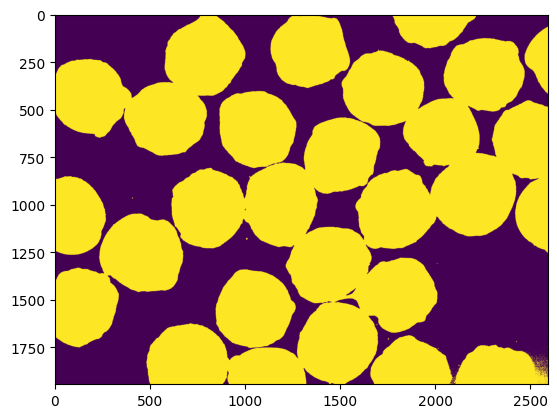

In [3]:
# Begin processing

os.makedirs(output_directory, exist_ok=True)

files_list = os.listdir(data_directory)

for f in files_list:

    file = os.path.join(data_directory, f)
    
    if os.path.isfile(file):
        print(f"Processing file: {file}")

        # Determine output filename
        fn = os.path.splitext(os.path.basename(file))[0]

        # Read in image
        image = skimage.io.imread(os.path.join(data_directory, file))
        image = skimage.color.rgb2gray(image)
        
        # Identify the EB cells

        if (fn == "HET66-1 2X") or (fn == "HET66-2 2X") or (fn == "HET66-3 2X"):
            # Handle these images
            labels, inner_cell_labels = segmentation.segment_cells(image, thresh = 0.95)
        else:        
            continue
            labels, inner_cell_labels = segmentation.segment_cells(image)

        # Measure properties
        cell_props = skimage.measure.regionprops(labels)
        inner_cell_props = skimage.measure.regionprops(inner_cell_labels)

        # Save output
        with open(os.path.join(output_directory, fn + ".csv"), 'w', newline='') as file:
        
            writer = csv.writer(file, delimiter=",")   
        
            #Write CSV headers
            writer.writerow(["Cell", "Label", "Total area (px)", "Bright region area (px)", "Ratio (Bright/Total)"])
        
            ctr = 0
            for p in cell_props:
                writer.writerow([ctr + 1, p.label, p.area, inner_cell_props[ctr].area, inner_cell_props[ctr].area/p.area])
                ctr += 1
                
        ovimg = imoverlay(image, inner_cell_labels, [0, 1, 0, 0.4], plot_outlines=False)
        skimage.io.imsave(os.path.join(output_directory, fn + ".png"), ovimg)

        print('\b...DONE', flush=True)
        